In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # So we can see all columns
pd.set_option('display.max_rows',200)

In [2]:
df = pd.read_csv('D:/Banque Misr Internship/Loan Datasets/sampled_data.csv')

In [3]:
df.head(5)


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0


Convert negative values to positive

In [4]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()

In [5]:
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,Laborers,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,Core staff,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,Laborers,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,Laborers,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,Core staff,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0


One-hot encode the categorical features

In [6]:
categorical_columns = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
    'ORGANIZATION_TYPE'
]
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the resulting DataFrame
df_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [7]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [8]:
get_numerical_summary(df_encoded)

AMT_ANNUITY : 12 (0.004%)
AMT_GOODS_PRICE : 278 (0.09%)
EXT_SOURCE_2 : 660 (0.215%)
EXT_SOURCE_3 : 60965 (19.825%)
OBS_30_CNT_SOCIAL_CIRCLE : 1021 (0.332%)
DEF_30_CNT_SOCIAL_CIRCLE : 1021 (0.332%)
OBS_60_CNT_SOCIAL_CIRCLE : 1021 (0.332%)
DEF_60_CNT_SOCIAL_CIRCLE : 1021 (0.332%)
DAYS_LAST_PHONE_CHANGE : 1 (0.0%)
AMT_REQ_CREDIT_BUREAU_HOUR : 41519 (13.502%)
AMT_REQ_CREDIT_BUREAU_YEAR : 41519 (13.502%)


{'AMT_ANNUITY': 0.003902299429939092,
 'AMT_GOODS_PRICE': 0.09040327012692229,
 'EXT_SOURCE_2': 0.21462646864665005,
 'EXT_SOURCE_3': 19.825307062186393,
 'OBS_30_CNT_SOCIAL_CIRCLE': 0.3320206431639844,
 'DEF_30_CNT_SOCIAL_CIRCLE': 0.3320206431639844,
 'OBS_60_CNT_SOCIAL_CIRCLE': 0.3320206431639844,
 'DEF_60_CNT_SOCIAL_CIRCLE': 0.3320206431639844,
 'DAYS_LAST_PHONE_CHANGE': 0.00032519161916159093,
 'AMT_REQ_CREDIT_BUREAU_HOUR': 13.501630835970097,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 13.501630835970097}

Remove Nulls

In [9]:
df_cleaned = df_encoded.dropna()


In [10]:
get_numerical_summary(df_cleaned)

{}

Split the data into features and target

In [11]:
# Split the data into features (X) and target (y)
x = df_cleaned.drop('TARGET', axis=1)
y = df_cleaned['TARGET']

Split the data into train/test

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
adasyn = ADASYN(sampling_strategy='minority', n_neighbors=5, random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [14]:
# Split the resampled data into training and validation sets
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [15]:
# Standardize the training data
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)

# Standardize the validation data using the same scaler
X_val_res_scaled = scaler.transform(X_val_res)


In [16]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(C=0.1,max_iter=5000, random_state=42)
#Saga handles large datasets and can be used for L1 (lasso) regularization.
# Train the model on the resampled training data
logreg.fit(X_train_res_scaled, y_train_res)

# Predict on the validation set
y_pred_logreg = logreg.predict(X_val_res_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_val_res_scaled)[:, 1]

# Calculate F1 and ROC-AUC
f1 = f1_score(y_val_res, y_pred_logreg)
roc_auc = roc_auc_score(y_val_res, y_pred_proba_logreg)
# Evaluate the model
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_val_res, y_pred_logreg))
print(f1)
print(roc_auc)


Logistic Regression Model
Accuracy: 0.9381839909430165
0.9350600724613741
0.9682117791502428


In [17]:
from sklearn.model_selection import cross_val_score

cv_f1_scores = cross_val_score(logreg, X_train_res_scaled, y_train_res, cv=5, scoring='f1')
cv_roc_auc_scores = cross_val_score(logreg, X_train_res_scaled, y_train_res, cv=5, scoring='roc_auc')

print("Cross-Validated F1 Score:", cv_f1_scores.mean())
print("Cross-Validated ROC-AUC Score:", cv_roc_auc_scores.mean())


Cross-Validated F1 Score: 0.9368264455770339
Cross-Validated ROC-AUC Score: 0.9692756907525734


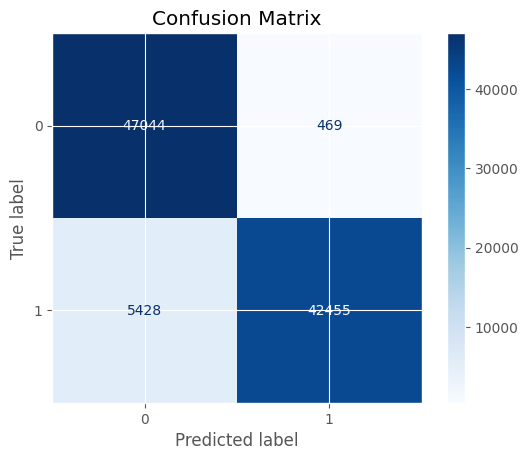

In [18]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_res, y_pred_logreg)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [19]:
# # Evaluate models
# logistic_metrics = {
#     "Accuracy": accuracy_score(y_test, y_pred_logistic),
#     "ROC-AUC": roc_auc,
#     "F1 Score": best_f1
# }
# print(logistic_metrics)

In [20]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)


DecisionTreeClassifier(random_state=42)

In [21]:
# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
nn_model.fit(X_train_res, y_train_res)

MLPClassifier(max_iter=2000, random_state=42)

In [22]:
# Predictions and evaluation for Decision Tree
y_pred_tree = tree_model.predict(X_val_res)
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_val_res, y_pred_tree))
print(f1_score(y_val_res, y_pred_tree))
print(roc_auc_score(y_val_res, y_pred_tree))

# Predictions and evaluation for Neural Network
y_pred_nn = nn_model.predict(X_val_res)
print("\nNeural Network Performance:")
print("Accuracy:", accuracy_score(y_val_res, y_pred_nn))
print(f1_score(y_val_res, y_pred_nn))
print(roc_auc_score(y_val_res, y_pred_nn))


Decision Tree Performance:
Accuracy: 0.8992620235649293
0.9003422171523385
0.8992335110794214

Neural Network Performance:
Accuracy: 0.5020650761038199
0.6684349762325233
0.5001264438610129


Another,more complex neural network

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),  # More layers and neurons
                    activation='relu',  # Activation function
                    solver='adam',  # Optimizer
                    alpha=0.0001,  # L2 regularization (weight decay)
                    learning_rate='adaptive',  # Learning rate scheduling
                    max_iter=1000,  # Increase epochs
                    random_state=42)
mlp.fit(X_train_res, y_train_res)

MLPClassifier(hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
              max_iter=1000, random_state=42)

In [24]:
# Predictions and evaluation for Neural Network
y_pred_nn = nn_model.predict(X_val_res)
print("\nNeural Network Performance:")
print("Accuracy:", accuracy_score(y_val_res, y_pred_nn))
print(f1_score(y_val_res, y_pred_nn))
print(roc_auc_score(y_val_res, y_pred_nn))


Neural Network Performance:
Accuracy: 0.5020650761038199
0.6684349762325233
0.5001264438610129


In [25]:
# Evaluate the model on the training set
y_pred_train = logreg.predict(X_train_res_scaled)
y_pred_proba_train = logreg.predict_proba(X_train_res_scaled)[:, 1]

# Calculate F1 and ROC-AUC for training data
f1_train = f1_score(y_train_res, y_pred_train)
roc_auc_train = roc_auc_score(y_train_res, y_pred_proba_train)

print("Training Data Evaluation")
print("F1 Score (Training):", f1_train)
print("ROC-AUC Score (Training):", roc_auc_train)

# Existing validation evaluation for comparison
print("Validation Data Evaluation")
print("F1 Score (Validation):", f1)
print("ROC-AUC Score (Validation):", roc_auc)


Training Data Evaluation
F1 Score (Training): 0.9368217966213355
ROC-AUC Score (Training): 0.9695404022114639
Validation Data Evaluation
F1 Score (Validation): 0.9350600724613741
ROC-AUC Score (Validation): 0.9682117791502428


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Use K-Fold Cross-Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_f1_scores_kf = cross_val_score(logreg, X_res, y_res, cv=kf, scoring='f1')
cv_roc_auc_scores_kf = cross_val_score(logreg, X_res, y_res, cv=kf, scoring='roc_auc')

print("K-Fold Cross-Validation Results")
print("Cross-Validated F1 Score (K-Fold):", cv_f1_scores_kf.mean())
print("Cross-Validated ROC-AUC Score (K-Fold):", cv_roc_auc_scores_kf.mean())
